# Dealing with Outliers

Sometimes outliers can mess up an analysis; you usually don't want a handful of data points to skew the overall results. Let's revisit our example of income data, with some random billionaire thrown in:

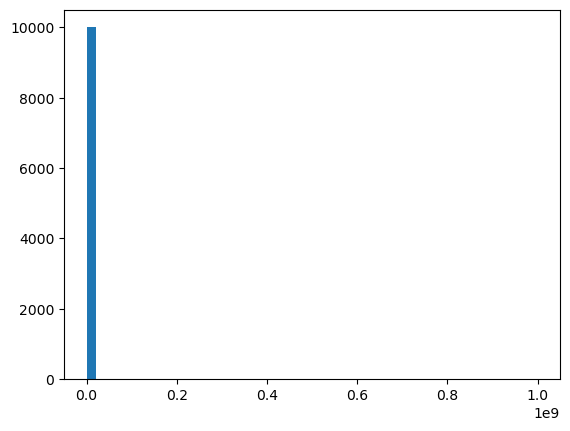

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

incomes = np.random.normal(27000, 15000, 10000) # Gera um conjunto de dados com 10.000 media de 27.000 e desvio padrão de 15.000

incomes = np.append(incomes, [1000000000]) # Adiciona um valor extrem

plt.hist(incomes, 50) # Cria um histograma para visualizar a distribuição dos rendimentos

plt.show()

That's not very helpful to look at. One billionaire ended up squeezing everybody else into a single line in my histogram. Plus it skewed my mean income significantly:

In [6]:
incomes.mean()

np.float64(126856.63128443115)

It's important to dig into what is causing your outliers, and understand where they are coming from. You also need to think about whether removing them is a valid thing to do, given the spirit of what it is you're trying to analyze. If I know I want to understand more about the incomes of "typical Americans", filtering out billionaires seems like a legitimate thing to do.

Here's something a little more robust than filtering out billionaires - it filters out anything beyond two standard deviations of the median value in the data set:

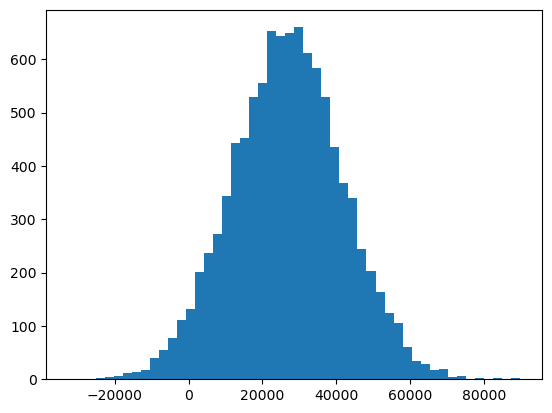

In [8]:
def reject_outliers(data):
    u = np.median(data) # Calcula a mediana dos dados
    s = np.std(data) # Calcula o desvio padrão dos dados
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)] # Mantém apenas os dados que estão a 2 desvios padrão da mediana
    return filtered

filtered = reject_outliers(incomes) # Filtra os outliers

plt.hist(filtered, 50)
plt.show()

That looks better. And, our mean is more, well, meangingful now as well:

In [9]:
np.mean(filtered) # A média dos dados filtrados é mais próxima da média original

np.float64(26869.316947559597)